# INEGI API Unemployment Rate Data -State level- 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats

# Import API key
from config import key_INEGI
from datetime import date
output_data_file0 = "output_data/desempleo.csv"
output_data_file = "output_data/rate_nal_desempleo.csv"
#code downloaded from stack overflow to iterate through dates as INEGI json national output is ("TIME PERIOD")
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [2]:
#URL test to see how json response is for posterior coding
url =(f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/444843/es/00000/true/BIE/2.0/{key_INEGI}?type=json")
response = requests.get(url).json()
requests.get(url)

<Response [200]>

In [3]:
#states dictionary gotten from INEGI at: https://gaia.inegi.org.mx/wscatgeo/mgee/
statesINEGI={
"datos": [
{
"cve_agee": "01",
"nom_agee": "Aguascalientes",
"nom_abrev": "Ags.",
"pob": "1184996",
"pob_fem": "608358",
"pob_mas": "576638",
"viv": "290877"
},
{
"cve_agee": "02",
"nom_agee": "Baja California",
"nom_abrev": "BC",
"pob": "3155070",
"pob_fem": "1563460",
"pob_mas": "1591610",
"viv": "870769"
},
{
"cve_agee": "03",
"nom_agee": "Baja California Sur",
"nom_abrev": "BCS",
"pob": "637026",
"pob_fem": "311593",
"pob_mas": "325433",
"viv": "178271"
},
{
"cve_agee": "04",
"nom_agee": "Campeche",
"nom_abrev": "Camp.",
"pob": "822441",
"pob_fem": "414720",
"pob_mas": "407721",
"viv": "213727"
},
{
"cve_agee": "05",
"nom_agee": "Coahuila de Zaragoza",
"nom_abrev": "Coah.",
"pob": "2748391",
"pob_fem": "1384194",
"pob_mas": "1364197",
"viv": "727613"
},
{
"cve_agee": "06",
"nom_agee": "Colima",
"nom_abrev": "Col.",
"pob": "650555",
"pob_fem": "327765",
"pob_mas": "322790",
"viv": "180488"
},
{
"cve_agee": "07",
"nom_agee": "Chiapas",
"nom_abrev": "Chis.",
"pob": "4796580",
"pob_fem": "2443773",
"pob_mas": "2352807",
"viv": "1091100"
},
{
"cve_agee": "08",
"nom_agee": "Chihuahua",
"nom_abrev": "Chih.",
"pob": "3406465",
"pob_fem": "1713920",
"pob_mas": "1692545",
"viv": "944681"
},
{
"cve_agee": "09",
"nom_agee": "Ciudad de México",
"nom_abrev": "CDMX",
"pob": "8851080",
"pob_fem": "4617297",
"pob_mas": "4233783",
"viv": "2453770"
},
{
"cve_agee": "10",
"nom_agee": "Durango",
"nom_abrev": "Dgo.",
"pob": "1632934",
"pob_fem": "829044",
"pob_mas": "803890",
"viv": "407784"
},
{
"cve_agee": "11",
"nom_agee": "Guanajuato",
"nom_abrev": "Gto.",
"pob": "5486372",
"pob_fem": "2846947",
"pob_mas": "2639425",
"viv": "1276913"
},
{
"cve_agee": "12",
"nom_agee": "Guerrero",
"nom_abrev": "Gro.",
"pob": "3388768",
"pob_fem": "1743207",
"pob_mas": "1645561",
"viv": "810596"
},
{
"cve_agee": "13",
"nom_agee": "Hidalgo",
"nom_abrev": "Hgo.",
"pob": "2665018",
"pob_fem": "1379796",
"pob_mas": "1285222",
"viv": "669514"
},
{
"cve_agee": "14",
"nom_agee": "Jalisco",
"nom_abrev": "Jal.",
"pob": "7350682",
"pob_fem": "3750041",
"pob_mas": "3600641",
"viv": "1831205"
},
{
"cve_agee": "15",
"nom_agee": "México",
"nom_abrev": "Mex.",
"pob": "15175862",
"pob_fem": "7778876",
"pob_mas": "7396986",
"viv": "3749499"
},
{
"cve_agee": "16",
"nom_agee": "Michoacán de Ocampo",
"nom_abrev": "Mich.",
"pob": "4351037",
"pob_fem": "2248928",
"pob_mas": "2102109",
"viv": "1082772"
},
{
"cve_agee": "17",
"nom_agee": "Morelos",
"nom_abrev": "Mor.",
"pob": "1777227",
"pob_fem": "918639",
"pob_mas": "858588",
"viv": "469091"
},
{
"cve_agee": "18",
"nom_agee": "Nayarit",
"nom_abrev": "Nay.",
"pob": "1084979",
"pob_fem": "543972",
"pob_mas": "541007",
"viv": "291163"
},
{
"cve_agee": "19",
"nom_agee": "Nuevo León",
"nom_abrev": "NL",
"pob": "4653458",
"pob_fem": "2333273",
"pob_mas": "2320185",
"viv": "1210893"
},
{
"cve_agee": "20",
"nom_agee": "Oaxaca",
"nom_abrev": "Oax.",
"pob": "3801962",
"pob_fem": "1982954",
"pob_mas": "1819008",
"viv": "941814"
},
{
"cve_agee": "21",
"nom_agee": "Puebla",
"nom_abrev": "Pue.",
"pob": "5779829",
"pob_fem": "3009974",
"pob_mas": "2769855",
"viv": "1392053"
},
{
"cve_agee": "22",
"nom_agee": "Querétaro",
"nom_abrev": "Qro.",
"pob": "1827937",
"pob_fem": "940749",
"pob_mas": "887188",
"viv": "454392"
},
{
"cve_agee": "23",
"nom_agee": "Quintana Roo",
"nom_abrev": "Q. Roo",
"pob": "1325578",
"pob_fem": "652358",
"pob_mas": "673220",
"viv": "369326"
},
{
"cve_agee": "24",
"nom_agee": "San Luis Potosí",
"nom_abrev": "SLP",
"pob": "2585518",
"pob_fem": "1325152",
"pob_mas": "1260366",
"viv": "639265"
},
{
"cve_agee": "25",
"nom_agee": "Sinaloa",
"nom_abrev": "Sin.",
"pob": "2767761",
"pob_fem": "1391560",
"pob_mas": "1376201",
"viv": "713296"
},
{
"cve_agee": "26",
"nom_agee": "Sonora",
"nom_abrev": "Son.",
"pob": "2662480",
"pob_fem": "1322868",
"pob_mas": "1339612",
"viv": "712402"
},
{
"cve_agee": "27",
"nom_agee": "Tabasco",
"nom_abrev": "Tab.",
"pob": "2238603",
"pob_fem": "1137845",
"pob_mas": "1100758",
"viv": "567233"
},
{
"cve_agee": "28",
"nom_agee": "Tamaulipas",
"nom_abrev": "Tamps.",
"pob": "3268554",
"pob_fem": "1652353",
"pob_mas": "1616201",
"viv": "901387"
},
{
"cve_agee": "29",
"nom_agee": "Tlaxcala",
"nom_abrev": "Tlax.",
"pob": "1169936",
"pob_fem": "604161",
"pob_mas": "565775",
"viv": "274243"
},
{
"cve_agee": "30",
"nom_agee": "Veracruz de Ignacio de la Llave",
"nom_abrev": "Ver.",
"pob": "7643194",
"pob_fem": "3947515",
"pob_mas": "3695679",
"viv": "2014588"
},
{
"cve_agee": "31",
"nom_agee": "Yucatán",
"nom_abrev": "Yuc.",
"pob": "1955577",
"pob_fem": "992244",
"pob_mas": "963333",
"viv": "507248"
},
{
"cve_agee": "32",
"nom_agee": "Zacatecas",
"nom_abrev": "Zac.",
"pob": "1490668",
"pob_fem": "763771",
"pob_mas": "726897",
"viv": "377018"
}
],
"metadatos": {
"fechaActualizacion": "2016/01",
"fuenteInfo": "Censo de Población y Vivienda, 2010"
},
"numReg": 32
}

In [4]:
num_states=statesINEGI["numReg"]
unemployment_rate=[]
state_ind=[]
states2=[]
states_index=[]
states_abrev=[]
#loop that goes through the number of registers from INEGI's dictionary 
for i in range(num_states):
    #appending specific data from the dictionary
    states2.append(statesINEGI["datos"][i]["nom_agee"])
    states_index.append(statesINEGI["datos"][i]["cve_agee"])
    states_abrev.append(statesINEGI["datos"][i]["nom_abrev"])
    x=i+444842 #this integer is added in order to match INEGI's API INDICATOR for the specific data requested
    url2 =(f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{x}/es/00000/true/BIE/2.0/{key_INEGI}?type=json")
    #data requerst to the API with the built URL using the counter to math the INDICATOR of INEGI
    response = requests.get(url2).json()
    #appending data from json response
    unemployment_rate.append(response["Series"][0]["OBSERVATIONS"][0]['OBS_VALUE'])
    state_ind.append(response["Series"][0]["INDICADOR"])

In [5]:
#Creating dataframe of API's data
unemp_dict = {"estado":states2,
    "Indicador Estado": state_ind,
    "Tasa Desempleo":unemployment_rate}
unemp_df = pd.DataFrame(unemp_dict)
unemp_df["Tasa Desempleo"].astype(float)
unemp_df.head()

,estado,Indicador Estado,Tasa Desempleo
0,Aguascalientes,444842,4.652458417955
1,Baja California,444843,1.635328888938
2,Baja California Sur,444844,2.623865946184
3,Campeche,444845,2.492287167826
4,Coahuila de Zaragoza,444846,4.971285430034


In [6]:
#read the file donated for analysis from the other program to start merging data
datoss = pd.read_excel(open('tabla_datos.xlsx','rb'))
datoss.count()

key                      18446
vsm_enero                18446
vsm_febrero              18446
PagosVencidos_enero      18446
PagosVencidos_febrero    18446
RemainingDebt_enero      18446
RemainingDebt_febrero    18446
estado                   18446
saldo_pesosE             18446
saldo_pesosF             18446
DueDaysE                 18446
DueDaysF                 18446
jump                     18446
dtype: int64

In [7]:
#Some data cleaning (State name standardized) and Filtering number of credits due, defined as +90 days that's the condition set for the loc function:
datoss["estado"].replace("Veracruz", "Veracruz de Ignacio de la Llave", inplace=True)
datoss["estado"].replace("Distrito Federal", "Ciudad de México", inplace=True)
datoss["estado"].replace("Michoacan", "Michoacán de Ocampo", inplace = True)
datoss["estado"].replace("Estado de Mexico", "México", inplace = True)
#datoss["estado"].value_counts()
datoss_due = datoss.loc[datoss["DueDaysF"]>=90,:].groupby(["estado"])
datoss_due.count().astype(float)
datoss_due.head()

,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,jump
63,63,2686.144,2686.144,3,4,753.40,763.78,Jalisco,2.023741e+06,2.051623e+06,90,120,-30
310,310,2686.144,2686.144,3,4,137.56,139.76,Ciudad de México,3.695060e+05,3.754155e+05,90,120,-30
519,519,2686.144,2686.144,2,3,305.70,310.98,Quintana Roo,8.211542e+05,8.353371e+05,60,90,-30
568,568,2686.144,2686.144,2,3,65.51,65.29,Quintana Roo,1.759693e+05,1.753783e+05,60,90,-30
633,633,2686.144,2686.144,2,3,106.25,107.96,Quintana Roo,2.854028e+05,2.899961e+05,60,90,-30
679,679,2686.144,2686.144,2,3,73.72,75.01,México,1.980225e+05,2.014877e+05,60,90,-30
1036,1036,2686.144,2686.144,3,3,124.72,119.04,Nuevo Leon,3.350159e+05,3.197586e+05,90,90,0
1695,1695,2686.144,2686.144,2,3,110.25,112.15,Queretaro,2.961474e+05,3.012510e+05,60,90,-30
1715,1715,2686.144,2686.144,3,4,88.32,89.83,Queretaro,2.372402e+05,2.412963e+05,90,120,-30
2167,2167,2686.144,2686.144,2,3,160.62,163.39,Guanajuato,4.314484e+05,4.388891e+05,60,90,-30


In [8]:
#slicing only the DueDaysF to check:
datoss_group=datoss_due["DueDaysF"].count()
datoss_group.head()

estado
Baja California        11
Baja California Sur     3
Campeche                1
Chiapas                 1
Chihuahua               2
Name: DueDaysF, dtype: int64

In [9]:
#merging both dataframes on "state", prioritizing the left dF values since are ordered and named after INEGI standards
result = pd.merge(unemp_df, datoss_group, on="estado", how='left')
result["DueDaysF"].fillna(0, inplace=True)
pd.options.display.float_format = '{:,.2f}'.format
result.groupby("estado").head()
#appending is not entirely working due to different names for the states; EQUAL ROW NAMES NEEDS TO BE FIXED BEFORE

,estado,Indicador Estado,Tasa Desempleo,DueDaysF
0,Aguascalientes,444842,4.652458417955,0.00
1,Baja California,444843,1.635328888938,11.00
2,Baja California Sur,444844,2.623865946184,3.00
3,Campeche,444845,2.492287167826,1.00
4,Coahuila de Zaragoza,444846,4.971285430034,0.00
5,Colima,444847,3.126243699347,0.00
6,Chiapas,444848,2.15344688477,1.00
7,Chihuahua,444849,3.422027317293,2.00
8,Ciudad de México,444850,5.470529164028,4.00
9,Durango,444851,4.159833139344,1.00


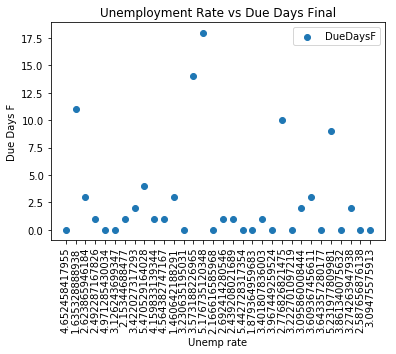

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(result["Tasa Desempleo"],result["DueDaysF"])
#Plot data format for easier reading, axes labeling, title, legend location, etc
#plt.xlim(0.0, 7.0)
#plt.ylim(0,15) #why min is not getting the right value??
plt.xticks(rotation=90)
plt.title("Unemployment Rate vs Due Days Final")
plt.xlabel("Unemp rate")
plt.ylabel("Due Days F")
plt.legend(loc="best")
plt.show()
plt.savefig("ratevsDays.jpg")

In [11]:
#Correlation test
x=result["Tasa Desempleo"].astype(float)
y=result["DueDaysF"].astype(int)
(x).corr(y)

0.14369421642303631

In [13]:
#T-test
ttest_rd1=stats.ttest_ind(x,y, equal_var = False)
ttest_rd1

Ttest_indResult(statistic=0.7963644832473891, pvalue=0.43124023986180504)

# INEGI -National- Unemployment Data Retrieval

In [14]:
#URL test to see how json response is for posterior coding; boolean indicator is turned to "false" to get the entire historical series
url =(f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/444666/es/00000/false/BIE/2.0/{key_INEGI}?type=json")
response_nal = requests.get(url).json()
#un-hashtag to see actual json structure response
#response_nal

In [15]:
#Determine the actual length of obesrvations from json response; in this case the data periods available
counter=len(response_nal["Series"][0]["OBSERVATIONS"])
counter

173

In [16]:
response_nal["Series"][0]["OBSERVATIONS"][0]['TIME_PERIOD']

'2005/01'

In [17]:
period=[]
national_rate=[]
#manual input of date matching the avaliable data from CNBV
start_date = date(2018, 6, 1)
end_date = date(2019, 5, 30)
for i in range(counter):
    period.append(response_nal["Series"][0]["OBSERVATIONS"][i]['TIME_PERIOD'])
    national_rate.append(response_nal["Series"][0]["OBSERVATIONS"][i]['OBS_VALUE'])
#Creating dataframe of API's data
national_dict = {"Mes":period,
    "Tasa Nal Desempleo":national_rate}
national_df = pd.DataFrame(national_dict)
national_df.head()
req_data = national_df.loc[national_df["Mes"]>"2018/05",:]
req_data.head()

,Mes,Tasa Nal Desempleo
161,2018/06,3.38527594
162,2018/07,3.47763888
163,2018/08,3.46852407
164,2018/09,3.60037254
165,2018/10,3.23839404


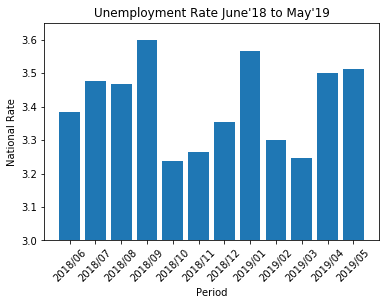

<Figure size 432x288 with 0 Axes>

In [18]:
plt.bar(req_data["Mes"],req_data["Tasa Nal Desempleo"].astype("float"))
#Plot labeling, title, legend location, etc
plt.xticks(rotation=45)
plt.title("Unemployment Rate June'18 to May'19")
plt.ylim(3.0,3.65)
plt.xlabel("Period")
plt.ylabel("National Rate")
plt.show()
plt.savefig("ratevsDaysNAL.jpg")